In [1]:
#SamplingAndConfidenceIntervals : ÖRNEKLEME VE GÜVEN ARALIKLARI

In [2]:
import scipy.integrate
import pylab
import random

In [3]:
def gaussian(x,mu,sigma):
    factor1=(1/(sigma*((2*pylab.pi)**0.5)))
    factor2=pylab.e**-(((x-mu)**2)/(2*sigma**2))
    return factor1*factor2

In [4]:
area=round(scipy.integrate.quad(gaussian,-3,3,(0,1))[0],4)
print('Probability of being within 3','of true mean of tight dist. =', area)
# ortalamanın 3 içinde olma olasılığı.(sıkı durumdayken)
#varyans degeri küçüldükçe olasılık değeri artar gitgide..

Probability of being within 3 of true mean of tight dist. = 0.9973


In [5]:
area=round(scipy.integrate.quad(gaussian,-3,3,(0,100))[0],4) #burda olan  parametreler: gaussian=hazır fonksiyon, "-3,+3" aralık
#(0,100) 0:ortalama, 100: varyans değeri, [0] gelen sonuç, 4: ondalık kısım.

print('Probability of being within 3','of true mean of wide dist. =', area)

#ortalamanın 3 içinde olma olasılığı.(geniş durumdayken)
#varyans degeri büyüdükçe olasılık değeri sapar gitgide.

Probability of being within 3 of true mean of wide dist. = 0.0239


In [6]:
def testSamples(numTrials,sampleSize):
    tightMeans,wideMeans=[],[] #tightMeans = Sıkı ortalama, wideMeans= Geniş ortalama 
    for t in range(numTrials):
        sampleTight,sampleWide=[],[]
        for i in range(sampleSize):
            sampleTight.append(random.gauss(0,1))
            sampleWide.append(random.gauss(0,100))
        tightMeans.append(sum(sampleTight)/len(sampleTight))
        wideMeans.append(sum(sampleWide)/len(sampleWide))
    return tightMeans, wideMeans

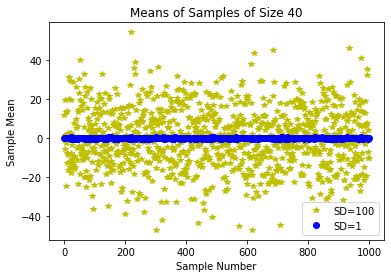

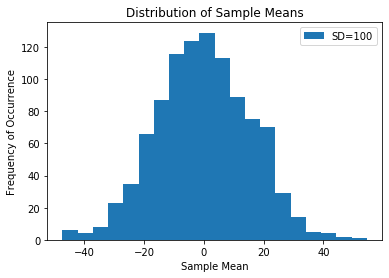

In [7]:
tightMeans,wideMeans=testSamples(1000,40)
pylab.plot(wideMeans,'y*',label='SD=100')
pylab.plot(tightMeans,'bo',label='SD=1')
pylab.xlabel('Sample Number')
pylab.ylabel('Sample Mean')
pylab.title('Means of Samples of Size ' + str(40))
pylab.legend()

pylab.figure()
pylab.hist(wideMeans,bins=20,label='SD=100')
pylab.title('Distribution of Sample Means')
pylab.xlabel('Sample Mean')
pylab.ylabel('Frequency of Occurrence')
pylab.legend()

In [ ]:
"""
-->Grafik aslında 40 tane sayının ortalamsını gösteriyor varyans değerlerine göre. Şimdi bunları inceleyecek olursak eğer:
Varyansı düşük olanın daha düzgün bir şekilde olduğunu görürüz. Bunlar işte sıkı diyebiliriz.
Varyansı yüksek olanın ise daha karmaşık olduğunu görürüz. Bunlarda geniş diye adlandırma yaparız.
Fakat bunların ortalamalarına bakarsak eğer ikisinin de ortalamsının 0 olduğunu bilmemiz gerek.
İkinci grafikte örneklem sayısını arttırdığımızda Sample Meanlerimizin limiti, popilasyon limiti ile çok çok benzerlik gösterir.
-->Eğer popilasyonun varyansı düşük ise az sayıda örnek ile gerçek bir değerine ulaşabiliriz. Fakat varyans yüksek ise daha çok örnek almamız gerekir.
-->The law of large numbers: Sample size değeri büyük olduğunda sample'nin istatistiği popülasyon değerine yaklaşır diyor. 

"""